# Big Mart Sales

#### Contents
1. Problem statement
2. Hypothesis definition
3. Data Cleaning
4. Data Exploration 
5. Feature Engineering
6. Model Building

### Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypothesis
#### Store level hypothesis 
1. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
2. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
3. Store type : Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Year of establishment: people are attracted to newer stores do to the assumption that there may be newer products
#### product level hypothesis
1. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
2. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
3. Price of item. Cheaper items are sold more than the more expensive items.

### Data Cleaning

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head(3)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58        20.75          Low Fat         0.007565  Snack Foods   
1           FDW14         8.30              reg         0.038428        Dairy   
2           NCN55        14.60          Low Fat         0.099575       Others   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store

In [4]:
train.head(3)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700

In [5]:
print("Train shape {} \n Test {}" .format(train.shape, test.shape))

Train shape (8523, 12) 
 Test (5681, 11)


Train data frame has 8523 entries each with 12 columns while the test dataframe contains 5681 entries with  11 entries.

#### Removing null values



In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

the weight of similar items then convert to dictionary.

In [8]:
item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')

In [26]:
item_avg_weight

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06                 17.600
NCX17                 21.250
NCX18                 14.150
NCX29                 10.000
NCX30                 16.700
NCX41                 19.000
NCX42                  6.360
NCX53                 20.100
NCX54                  9.195
NCY05                 13.500
NCY06                 15.250
NCY17                 18.200
NCY18                  7.285
NCY29                 13.650
NCY30                 20.250
NCY41                 16.750
NCY42                  6.380
NCY53                 20.000
NCY54                  8.430
NCZ05                  8.485
NCZ06                 19.600
NCZ17                 12.150
NCZ18                  7.825
NCZ29                 15.000
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1555 rows x 1 columns]

In [9]:
dic = item_avg_weight.to_dict()

In [10]:
dic2 = dic['Item_Weight']

map the dictionary to theit correct values.

In [11]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Identifier'].map(dic2))

In [12]:
train['Item_Weight'].isnull().sum()

4

In [13]:
train[train['Item_Weight'].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 3  Supermarket Type3          1569.9564  
1922      Medium               Tier 3  Supermarket Type3          4434.2280  
4187      Medium               Tier 3  Supermarket Type3          3453.5046  
5022       Small               Tier 1      Grocery Store           120.5098

The 4 items are unique, filled the nan values with mean. 

In [14]:
train['Item_Weight'].fillna(value=train['Item_Weight'].mean(), inplace=True)

In [15]:
train['Item_Weight'].isnull().sum()

0

We do the same to the test dataframe

In [16]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Identifier'].map(dic2))

In [17]:
test['Item_Weight'].isnull().sum()

1

In [18]:
test['Item_Weight'].fillna(value=test['Item_Weight'].mean(), inplace=True)

In [19]:
test['Item_Weight'].isnull().sum()

0

Removing nan for outlet size.
We can fill with the mode of outlet type.


In [20]:
from scipy.stats import mode

In [24]:
outlet_size_mode = train.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])

In [39]:
outlet_size_mode = outlet_size_mode.T

In [40]:
outlet_size_dict = outlet_size_mode.to_dict()

In [41]:
outlet_size_dict_ = outlet_size_dict['Outlet_Size']

In [42]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Type'].map(outlet_size_dict_))

In [43]:
print(train['Outlet_Size'].isnull().sum())

0


We can do the same to test

In [44]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Type'].map(outlet_size_dict_))

In [45]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

With out the null values we can test some of the hypothesis
##### Outlet size

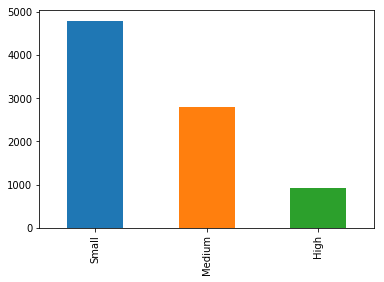

In [60]:
train['Outlet_Size'].value_counts().plot(kind='bar')


There are more small size outlets than the rest.

In [69]:
outlet_size_plot = train.groupby(train['Outlet_Size']).mean()['Item_Outlet_Sales']

In [70]:
outlet_size_plot

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1867.182814
Name: Item_Outlet_Sales, dtype: float64

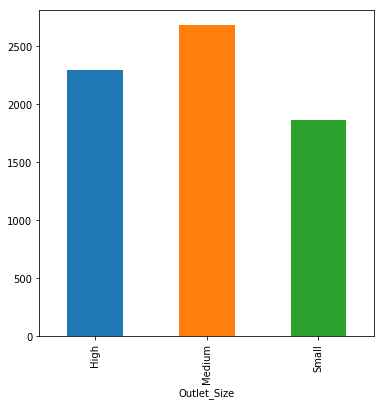

In [75]:
outlet_size_plot.plot(kind='bar',figsize=(6, 6))

In [46]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   498
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64